visualize variance explained at each step and the learnt partition

---

In [1]:
import utils
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import colors as mc
from matplotlib import pyplot as plt
%matplotlib inline

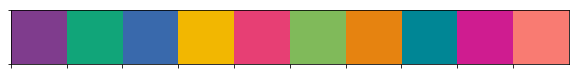

In [2]:
color_list = utils.palettable.cartocolors.qualitative.Bold_10.mpl_colors
sns.palplot(color_list)

In [3]:
'; '.join(utils.palettable.cartocolors.qualitative.Bold_10.hex_colors)

'#7F3C8D; #11A579; #3969AC; #F2B701; #E73F74; #80BA5A; #E68310; #008695; #CF1C90; #F97B72'

In [4]:
purple_color = '#A575B0'
my_cmap = mc.LinearSegmentedColormap.from_list('my_cmap', ['#ffffff', purple_color], N=30)

In [5]:
green_color = '#76FD51'
blue_color = '#3181BD'
#bgcolor = '#FFEDD5'
bgcolor = 'lightgray'

In [6]:
color_index = 0
my_color = color_list[color_index]
#freq_cmap = mc.LinearSegmentedColormap.from_list('freq_cmap', ['#EDEDED', my_color], N=30)
#freq_cmap = mc.LinearSegmentedColormap.from_list('my_cmap', ['#B491BB', '#666666'], N=30)
freq_cmap = 'Oranges'

In [7]:
orange_color = '#E6830F'
color_index = 6
my_orange_color = color_list[color_index]
#my_cmap = mc.LinearSegmentedColormap.from_list('my_cmap', ['#95C8D8', '#666666'], N=30)
#my_cmap = mc.LinearSegmentedColormap.from_list('my_cmap', ['#3969AC', 'gray', '#F97B72'], N=30)
#my_cmap = mc.LinearSegmentedColormap.from_list('my_cmap', ['#A4BAEE', '#747982', '#FDB0B4'], N=100)
#my_cmap = mc.LinearSegmentedColormap.from_list('my_cmap', ['#2E4C90', bgcolor, '#FDB0B4'], N=100)
#my_cmap = mc.LinearSegmentedColormap.from_list('my_cmap', ['blue', 'black'], N=100)
my_cmap = 'Blues'

In [8]:
pcolor_kwargs = {'edgecolor': 'w', 'lw': 1}

---

a madeup dataname input for `pys3d` so that we can calculate the threhold.

In [9]:
from pys3d import PYS3D
s3d = PYS3D('xx')

...s3d initializing...
s3d with xx data, splitted into 0 folds
data will be loaded from ../splitted_data/xx/
built models will be saved to models/xx/
predictions will be saved to predictions/xx/
temporary subfolders in  ./tmp/xx
...done initializing...



#### stackoverflow (subset)

##### feature importance

In [10]:
ylab_list = ['# of Ans. Before', 'Reputation', 'Signup Duration',
             'Signup Percentile', 'Code Lines', 'Words', 'Session Len.',
             'Time Since Prev. Ans.', 'URLs', 'Ans. Position',
             'Readability', 'Images',
            ]

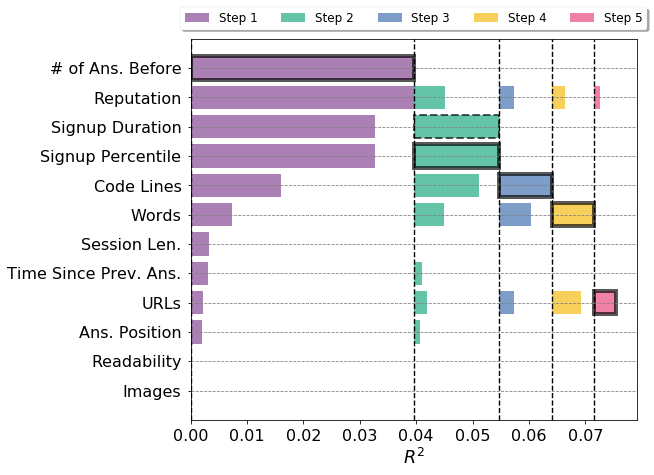

In [11]:
data_name = 'stackoverflow_cleaned_subset'
#split_version = 1
#model_folder = 'models/{}/{}/'.format(data_name, split_version)
model_folder = 'full-models/{}/'.format(data_name)
fig, ax = utils.visualize_s3d_steps(model_folder, figsize=(8, 7), 
                                    color_list=color_list, bar_alpha=0.65)
mapping = dict(zip([t.get_text() for t in ax.get_yticklabels()[::-1]], ylab_list))
_ = ax.set_yticklabels(ylab_list[::-1])
fig.savefig(fname='figures/feature_importance_{}.pdf'.format(data_name.split('_')[0]), 
            dpi=3000, format='pdf',
            bbox_inches = 'tight')

In [12]:
feature_list = ['# of Ans. Before', 'Signup Percentile', 'Code Lines', 'Word']
feature_list

['# of Ans. Before', 'Signup Percentile', 'Code Lines', 'Word']

##### feature network

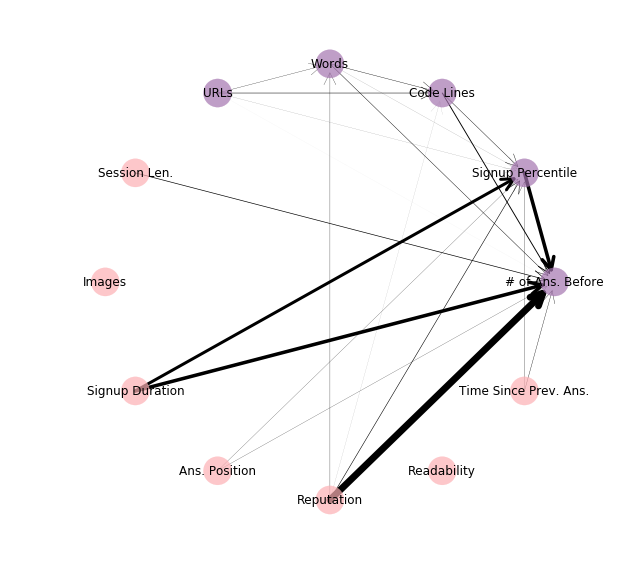

In [13]:
net, (fig, ax) = utils.visualize_feature_network(model_folder=model_folder, w_scale=200, arrowsize=30,
                                                 node_kwargs={'alpha': 0.7}, label_kwargs={'labels': mapping},
                                                 color_choice=dict(zip(['selected', 'unselected', 'isolated'], 
                                                                       #[purple_color, '#a4baee', 'k'])))
                                                                       [purple_color, '#FDB0B4', 'k'])))
                                                                       #color_list[:3])))
xmin, xmax = ax.get_xlim()
ax.set_xlim([xmin*1.05, xmax*1.05])
ymin, ymax = ax.get_ylim()
_ = ax.set_ylim([ymin*1.03, ymax*1.03])
fig.savefig(fname='figures/feature_network_{}.pdf'.format(data_name.split('_')[0]), 
            dpi=3000, format='pdf',
            bbox_inches = 'tight')

##### distribution

In [14]:
thres = s3d.calculate_disc_threshold(model_folder, 5)
thres

0.38509199999999999

In [15]:
pred_cmap = mc.LinearSegmentedColormap.from_list('my_cmap', 
                                                 ['#76FD51']*385 + ['red']*615, 
                                                 N=1000)

###### 1d

In [18]:
dim = 1
#thres = 0.179732
#thres = 0.5
splits_at_dim, N_dim, intensity_dim, pred_dim, chosen_f_dim = utils.visualize_s3d_model_reader(model_folder, dim, thres)
splits_at_dim

[[0.0, 53.0, 546.0, 3587.0, 11033.0, 22330.0]]

In [19]:
chosen_f_dim

array(['number_of_ans_wrote_by_user_before_this'], dtype=object)

In [20]:
N_dim

masked_array(data = [284011 434410 234784  62463  10557],
             mask = False,
       fill_value = 999999)

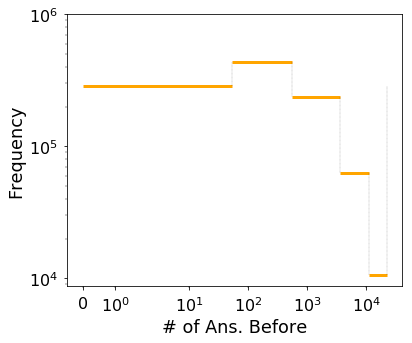

In [21]:
fig, ax = utils.visualize_s3d_model_1d(splits_at_dim, N_dim, 
                                       xlab=chosen_f_dim[0], 
                                       ylab='Frequency',
                                       xscale='symlog',
                                       yscale='log',
                                       figsize=(6,5),
                                       #hlines_kwargs={'color': color_list[0], 'linewidth': 3}
                                       #hlines_kwargs={'color': purple_color, 'linewidth': 3}
                                       hlines_kwargs={'color': 'orange', 'linewidth': 3}
                                      )
ax.set_xlabel(feature_list[0])
ax.set_xlabel(feature_list[0])
_ = ax.set_yticks([10**4, 10**5, 10**6])
#ax.yaxis.tick_right()
#ax.yaxis.set_label_position("right")
#ax.set_yticklabels([10, 20, 30, 40])
fig.savefig(fname='figures/freq_{}_{}.pdf'.format(data_name.split('_')[0], dim),
            dpi=3000, format='pdf',
            bbox_inches = 'tight')

In [22]:
intensity_dim

masked_array(data = [ 0.242836  0.325559  0.413086  0.524118  0.872691],
             mask = False,
       fill_value = 1e+20)

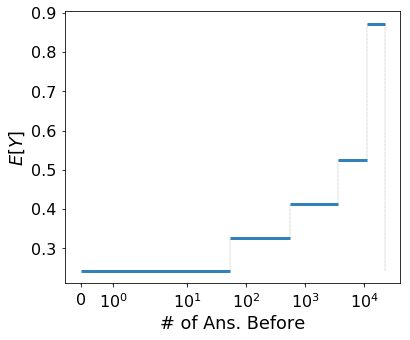

In [23]:
fig, ax = utils.visualize_s3d_model_1d(splits_at_dim, intensity_dim, 
                                       xlab=chosen_f_dim[0], ylab=r'$E[Y]$',
                                       figsize=(6,5),
                                       xscale='symlog', yscale='linear',
                                       hlines_kwargs={'color': blue_color, 'linewidth': 3}
                                      )
ax.set_xlabel(feature_list[0])
fig.savefig(fname='figures/ey_{}_{}.pdf'.format(data_name.split('_')[0], dim),
            dpi=3000, format='pdf',
            bbox_inches = 'tight')

In [24]:
pred_dim

masked_array(data = [False False  True  True  True],
             mask = False,
       fill_value = True)

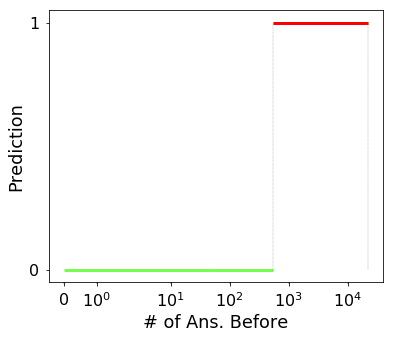

In [26]:
fig, ax = utils.visualize_s3d_model_1d(splits_at_dim, pred_dim, 
                                       xlab=chosen_f_dim[0], ylab=r'Prediction',
                                       xscale='symlog', yscale='linear',
                                       #hlines_kwargs={'color': orange_color, 'linewidth': 3}
                                       figsize=(6,5),
                                       hlines_kwargs={'color': green_color, 'linewidth': 3}
                                      )
ax.hlines(y=1, xmax=splits_at_dim[0][-1], 
          xmin=splits_at_dim[0][-4], 
          colors='r', lw=3)
ax.set_xlabel(feature_list[0])
ax.set_yticks([0, 1])
fig.savefig(fname='figures/pred_{}_{}.pdf'.format(data_name.split('_')[0], dim),
            dpi=3000, format='pdf',
            bbox_inches = 'tight')

###### 2d

In [27]:
dim = 2
splits_at_dim, N_dim, intensity_dim, pred_dim, chosen_f_dim = utils.visualize_s3d_model_reader(model_folder, dim, thres)
chosen_f_dim

array(['number_of_ans_wrote_by_user_before_this', 'percentile'], dtype=object)

In [28]:
splits_at_dim

[[0.0, 53.0, 546.0, 3587.0, 11033.0, 22330.0],
 [-7.49574e-08, 0.323457, 0.564794, 0.762954, 0.972459, 1.0]]

In [29]:
splits_at_dim[1][0] = 0
splits_at_dim

[[0.0, 53.0, 546.0, 3587.0, 11033.0, 22330.0],
 [0, 0.323457, 0.564794, 0.762954, 0.972459, 1.0]]

In [30]:
N_dim.data

array([[154118,  56646,  28594,  35129,   9524],
       [ 78934, 100854,  85663, 129720,  39239],
       [  5531,  28231,  60664,  96280,  44078],
       [     0,   1666,   7606,  34679,  18512],
       [     0,      0,      0,   7132,   3425]])

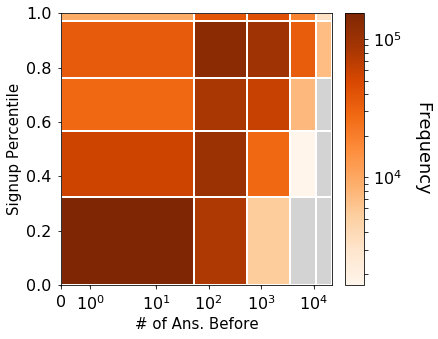

In [31]:
#cbar_ticks = (pd.np.array([4, 8, 12])*1e4).astype(int)
#cbar_ticks = (pd.np.array([10**3, 10**4, 10**5]))
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, freq_cmap,#my_cmap,
                                            N_dim, 'Frequency', feature_list,
                                            unit_w=6, unit_h=5,
                                            xscale='symlog', 
                                            yscale='linear',
                                            #yscale='log',
                                            norm_func=mc.LogNorm,
                                            #cb_kwargs={'ticks': cbar_ticks},
                                            pcolor_kwargs=pcolor_kwargs,
                                           )
ax_arr[0,0].set_facecolor(bgcolor)
#_ = ax_arr[0,0].set_xticks(pd.np.round(splits_at_dim[0], 2))
#ax_arr[0,0].set_xticklabels(pd.np.round(splits_at_dim[0], 3), fontdict={'size': 12})
fig.savefig(fname='figures/freq_{}_{}.pdf'.format(data_name.split('_')[0], dim),
            dpi=3000, format='pdf',
            bbox_inches = 'tight')

In [32]:
intensity_dim.data

array([[ 0.189167,  0.266868,  0.323145,  0.355148,  0.312999],
       [ 0.232637,  0.279711,  0.34017 ,  0.392723,  0.376386],
       [ 0.425782,  0.358648,  0.404194,  0.421697,  0.439789],
       [ 0.      ,  1.      ,  0.721273,  0.493728,  0.457217],
       [ 0.      ,  0.      ,  0.      ,  0.996775,  0.614307]])

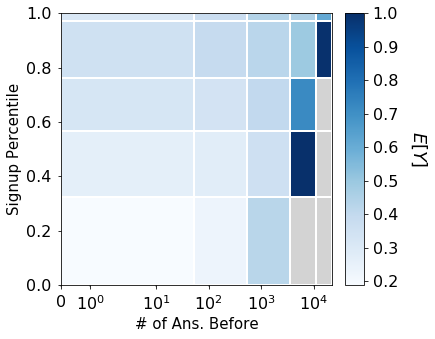

In [33]:
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, my_cmap, 
                                            intensity_dim, '$E[Y]$', feature_list,
                                            unit_w=6, unit_h=5,
                                            #xscale='linear',
                                            xscale='symlog',
                                            yscale='linear',
                                            pcolor_kwargs=pcolor_kwargs,
                                           )
ax_arr[0,0].set_facecolor(bgcolor)
fig.savefig(fname='figures/ey_{}_{}.pdf'.format(data_name.split('_')[0], dim),
            dpi=3000, format='pdf',
            bbox_inches = 'tight')

In [34]:
pred_dim

masked_array(data =
 [[False False False False False]
 [False False False True False]
 [True False True True True]
 [-- True True True True]
 [-- -- -- True True]],
             mask =
 [[False False False False False]
 [False False False False False]
 [False False False False False]
 [ True False False False False]
 [ True  True  True False False]],
       fill_value = True)

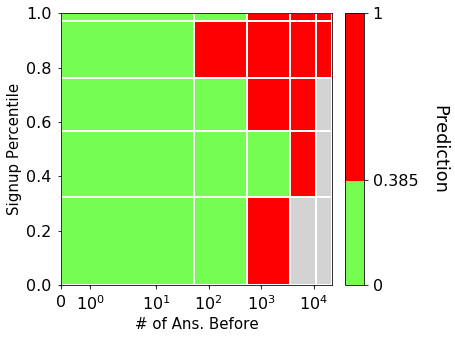

In [35]:
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, pred_cmap, 
                                            pred_dim, 'Prediction', feature_list,
                                            unit_w=6, unit_h=5,
                                            xscale='symlog',
                                            yscale='linear',
                                            pcolor_kwargs=pcolor_kwargs,
                                           )
ax_arr[0,0].set_facecolor(bgcolor)
cb.set_ticks([0, thres, 1])
cb.set_ticklabels(['0', round(thres,3), '1'])
fig.savefig(fname='figures/pred_{}_{}.pdf'.format(data_name.split('_')[0], dim),
            dpi=3000, format='pdf',
            bbox_inches = 'tight')

###### 3d

In [36]:
dim = 3
splits_at_dim, N_dim, intensity_dim, pred_dim, chosen_f_dim = utils.visualize_s3d_model_reader(model_folder, dim, thres)

In [37]:
chosen_f_dim

array(['number_of_ans_wrote_by_user_before_this', 'percentile',
       'code_lines'], dtype=object)

In [38]:
splits_at_dim

[[0.0, 53.0, 546.0, 3587.0, 11033.0, 22330.0],
 [-7.49574e-08, 0.323457, 0.564794, 0.762954, 0.972459, 1.0],
 [0.0, 0.0, 1037.0]]

In [39]:
## percentile
splits_at_dim[1][0] = 0
## code lines
splits_at_dim[2][0] = 0.01
splits_at_dim[2][1] = 0.1
splits_at_dim

[[0.0, 53.0, 546.0, 3587.0, 11033.0, 22330.0],
 [0, 0.323457, 0.564794, 0.762954, 0.972459, 1.0],
 [0.01, 0.1, 1037.0]]

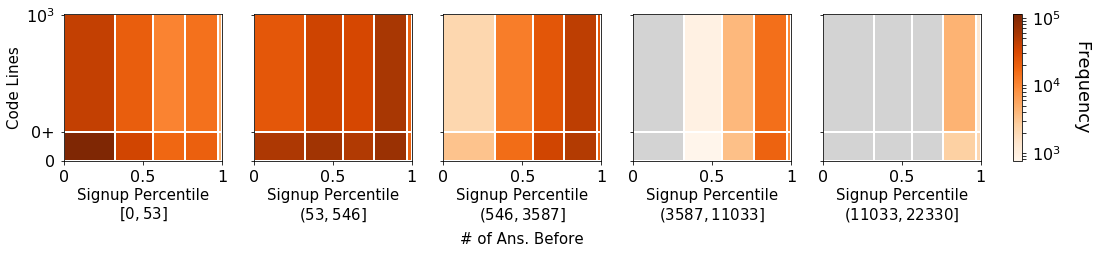

In [40]:
#cbar_ticks = (pd.np.array([2, 4, 6, 8, 10])*1e4).astype(int)
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, freq_cmap,#my_cmap,
                                            N_dim, 'Frequency', feature_list,
                                            unit_w=4, unit_h=2.7,
                                            xscale='linear',
                                            #yscale='symlog',
                                            yscale='log',
                                            xbins_lab_decimal=0, #norm_func=mc.LogNorm,
                                            xlab_x=0.4, xlab_y=-0.3, ylab_x=-0.08,
                                            norm_func=mc.LogNorm,
                                            pcolor_kwargs=pcolor_kwargs,
                                            #cb_kwargs={'ticks': cbar_ticks},
                                           )
#cb.set_ticklabels(cbar_ticks//(10000))
for ax in ax_arr.flat:
    ax.set_facecolor(bgcolor)
    ax.set_xticks([0, 0.5, 1])
    ax.set_xticklabels([0, 0.5, 1])
    ax.set_yticks([0.01, 0.1, 1000])
    ax.set_yticklabels([0, '0+', r'$10^3$'])
fig.savefig(fname='figures/freq_{}_{}.pdf'.format(data_name.split('_')[0], dim),
            dpi=3000, format='pdf',
            bbox_inches = 'tight')

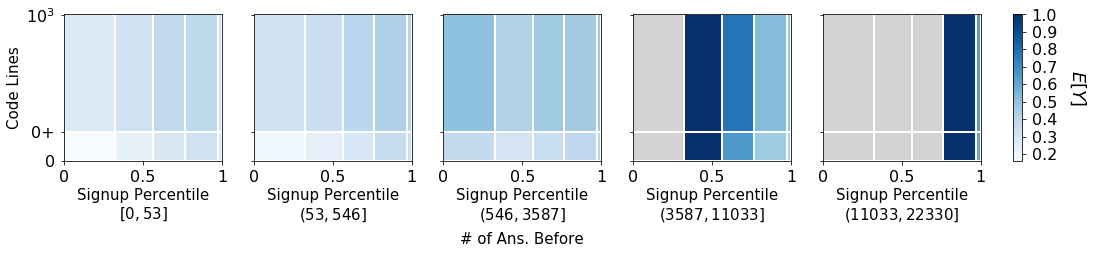

In [41]:
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, my_cmap,
                                            intensity_dim, '$E[Y]$', feature_list,
                                            unit_w=4, unit_h=2.7,
                                            xscale='linear',
                                            yscale='log',
                                            xbins_lab_decimal=0,
                                            xlab_x=0.4, xlab_y=-0.3, ylab_x=-0.08,
                                            pcolor_kwargs=pcolor_kwargs,
                                           )
for ax in ax_arr.flat:
    ax.set_facecolor(bgcolor)
    ax.set_xticks([0, 0.5, 1])
    ax.set_xticklabels([0, 0.5, 1])
    #ax.set_xticks([])
    #ax.set_xlabel('')
    ax.set_yticks([0.01, 0.1, 1000])
    #ax.set_yticklabels([0, 0, 1000])
    ax.set_yticklabels([0, '0+', r'$10^3$'])
fig.savefig(fname='figures/ey_{}_{}.pdf'.format(data_name.split('_')[0], dim),
            dpi=3000, format='pdf',
            bbox_inches = 'tight')

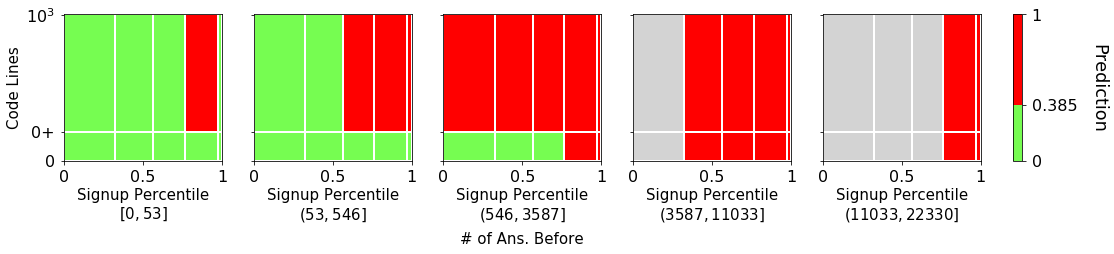

In [42]:
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, pred_cmap,
                                            pred_dim, 'Prediction', feature_list,
                                            unit_w=4, unit_h=2.7,
                                            xscale='linear',
                                            yscale='log',
                                            xbins_lab_decimal=0,
                                            xlab_x=0.4, xlab_y=-0.3, ylab_x=-0.08,
                                            pcolor_kwargs=pcolor_kwargs,
                                           )
for ax in ax_arr.flat:
    ax.set_facecolor(bgcolor)
    ax.set_xticks([0, 0.5, 1])
    ax.set_xticklabels([0, 0.5, 1])
    ax.set_yticks([0.01, 0.1, 1000])
    ax.set_yticklabels([0, '0+', r'$10^3$'])
cb.set_ticks([0, thres, 1])
cb.set_ticklabels(['0', round(thres,3), '1'])
fig.savefig(fname='figures/pred_{}_{}.pdf'.format(data_name.split('_')[0], dim),
            dpi=3000, format='pdf',
            bbox_inches = 'tight')

###### 4d

In [16]:
dim = 4
splits_at_dim, N_dim, intensity_dim, pred_dim, chosen_f_dim = utils.visualize_s3d_model_reader(model_folder, dim, thres)
chosen_f_dim

array(['number_of_ans_wrote_by_user_before_this', 'percentile',
       'code_lines', 'words'], dtype=object)

In [17]:
splits_at_dim

[[0.0, 53.0, 546.0, 3587.0, 11033.0, 22330.0],
 [-7.49574e-08, 0.323457, 0.564794, 0.762954, 0.972459, 1.0],
 [0.0, 0.0, 1037.0],
 [0.0, 42.0, 85.0, 178.0, 3696.0]]

In [18]:
##
splits_at_dim[1][0] = 0
## 
splits_at_dim[2][0] = 0.01
splits_at_dim[2][1] = 0.1
## 
splits_at_dim

[[0.0, 53.0, 546.0, 3587.0, 11033.0, 22330.0],
 [0, 0.323457, 0.564794, 0.762954, 0.972459, 1.0],
 [0.01, 0.1, 1037.0],
 [0.0, 42.0, 85.0, 178.0, 3696.0]]

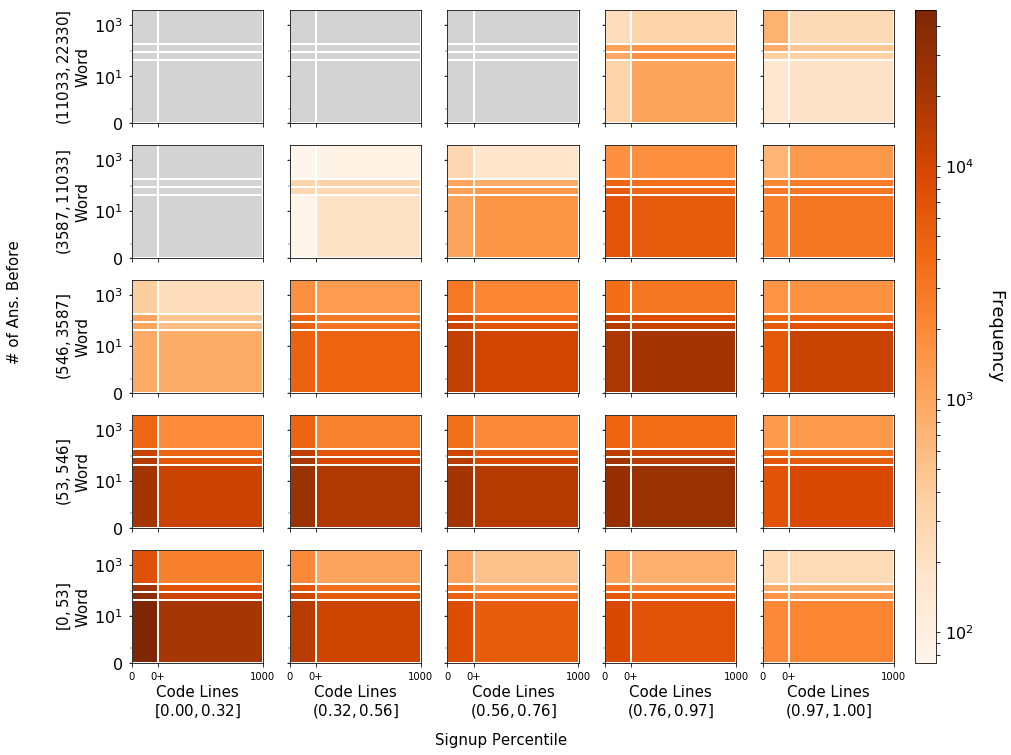

In [23]:
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, freq_cmap, 
                                            #N_dim, 'Freq ($10k$)', feature_list,
                                            N_dim, 'Frequency', feature_list,
                                            #xscale='symlog',
                                            yscale='symlog',
                                            xbins_lab_decimal=2, ybins_lab_decimal=0,
                                            xlab_y=0.03, ylab_x=0.02,
                                            #cb_kwargs={'ticks': cbar_ticks, 'aspect': 30},
                                            cb_kwargs={'aspect': 30},
                                            norm_func=mc.LogNorm,
                                            pcolor_kwargs=pcolor_kwargs,
                                           )
for ax in ax_arr.flat:
    ax.set_facecolor(bgcolor)
    ax.set_xticks([0.01, 0.1, 1000])
    ax.set_yticks([0, 10, 1000])
    ax.set_xticklabels([0, '0+', 1000], fontsize=10)
fig.savefig(fname='figures/freq_{}_{}.pdf'.format(data_name.split('_')[0], dim),
            dpi=1000, format='pdf',
            bbox_inches = 'tight')

In [24]:
fig.savefig(fname='figures/freq_{}_{}.png'.format(data_name.split('_')[0], dim),
            dpi=1000, format='png',
            bbox_inches = 'tight')

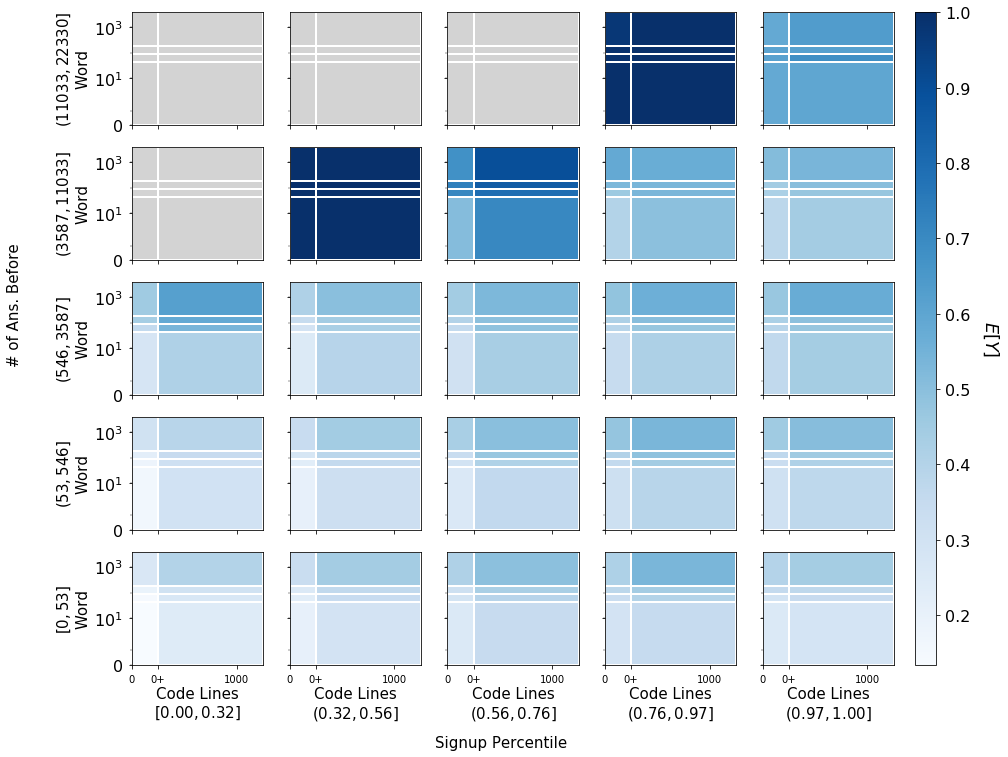

In [25]:
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, my_cmap, 
                                            intensity_dim, '$E[Y]$', feature_list,
                                            xbins_lab_decimal=2, ybins_lab_decimal=0,
                                            xlab_y=0.03, ylab_x=0.02,
                                            yscale='symlog',
                                            cb_kwargs={'aspect': 30},
                                            pcolor_kwargs=pcolor_kwargs,
                                           )
for ax in ax_arr.flat:
    ax.set_facecolor(bgcolor)
    ax.set_xticks([0.01, .1, 100])
    ax.set_yticks([0, 10, 1000])
    ax.set_xticklabels([0, '0+', 1000], fontsize=10)
fig.savefig(fname='figures/ey_{}_{}.pdf'.format(data_name.split('_')[0], dim),
            dpi=1000, format='pdf',
            bbox_inches = 'tight')

In [26]:
fig.savefig(fname='figures/ey_{}_{}.png'.format(data_name.split('_')[0], dim),
            dpi=1000, format='png',
            bbox_inches = 'tight')

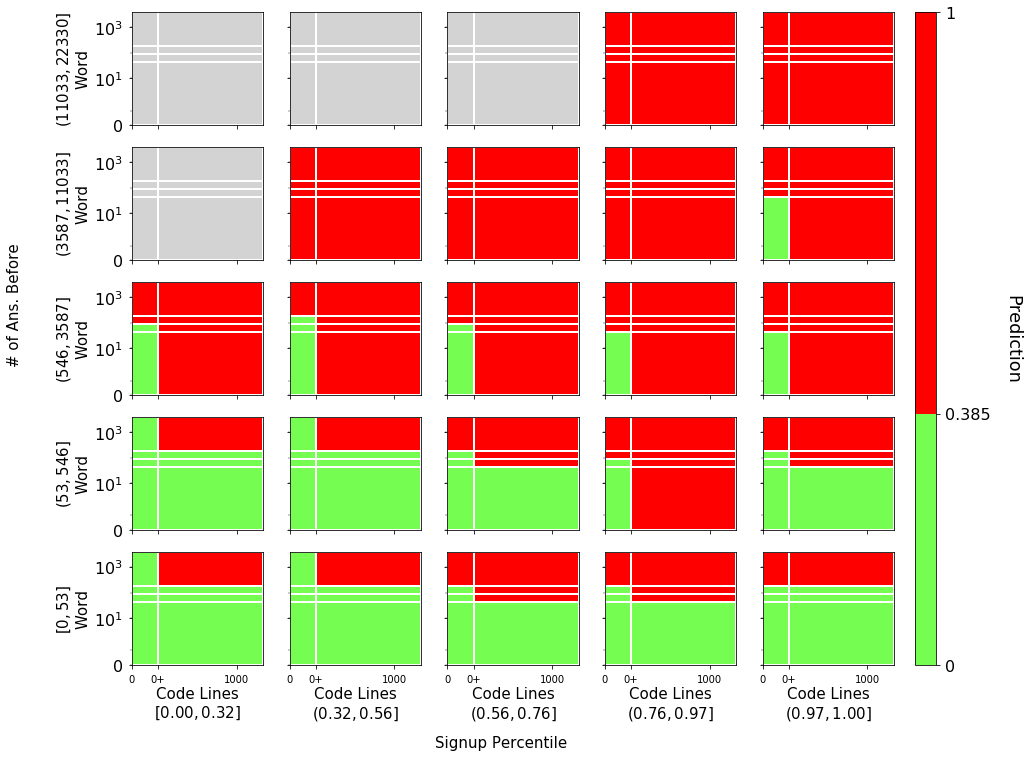

In [27]:
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, pred_cmap, 
                                            pred_dim, 'Prediction', feature_list,
                                            xbins_lab_decimal=2, ybins_lab_decimal=0,
                                            xlab_y=0.03, ylab_x=0.02,
                                            yscale='symlog',
                                            cb_kwargs={'aspect': 30},
                                            pcolor_kwargs=pcolor_kwargs,
                                           )
for ax in ax_arr.flat:
    ax.set_facecolor(bgcolor)
    ax.set_xticks([0.01, .1, 100])
    ax.set_yticks([0, 10, 1000])
    ax.set_xticklabels([0, '0+', 1000], fontsize=10)
    
#_ = fig.texts[1].set_visible(False)
cb.set_ticks([0, thres, 1])
cb.set_ticklabels(['0', round(thres,3), '1'])
fig.savefig(fname='figures/pred_{}_{}.pdf'.format(data_name.split('_')[0], dim),
            dpi=1000, format='pdf',
            bbox_inches = 'tight')

In [28]:
fig.savefig(fname='figures/pred_{}_{}.png'.format(data_name.split('_')[0], dim),
            dpi=1000, format='png',
            bbox_inches = 'tight')

---

#### digg

##### feature importance

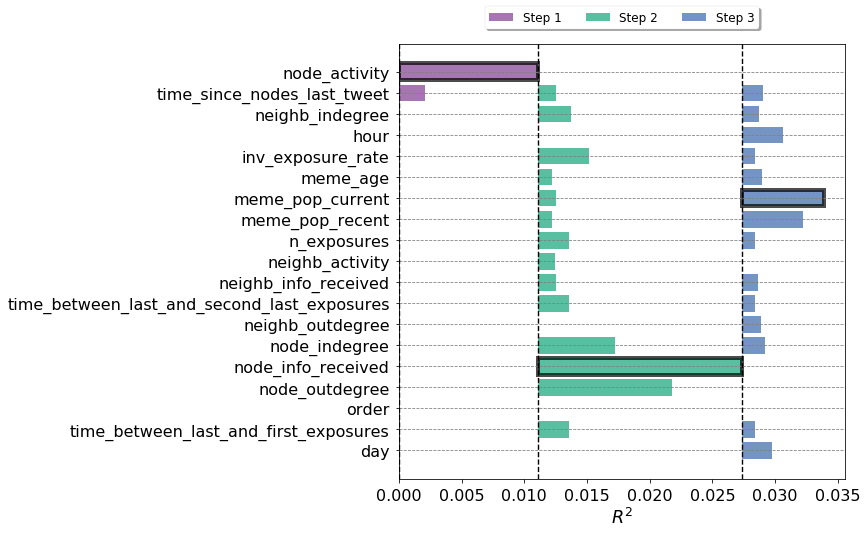

In [29]:
data_name = 'digg'
model_folder = 'full-models/{}/'.format(data_name)
fig, ax = utils.visualize_s3d_steps(model_folder, figsize=(8, 8), 
                                    color_list=color_list, bar_alpha=0.7)
fig.savefig(fname='figures/feature_importance_{}.pdf'.format(data_name.split('_')[0]), 
            dpi=1000, format='pdf',
            bbox_inches = 'tight')

In [30]:
feature_list = ['User Activity', 'Info Received', 'Meme Pop. (Current)']

##### feature network

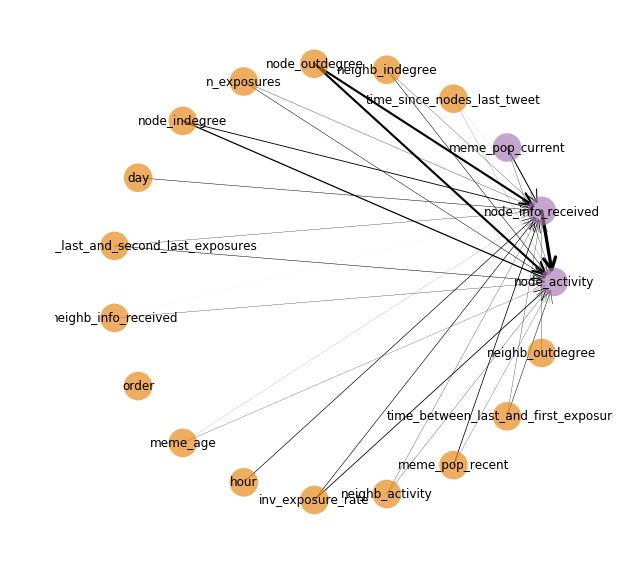

In [31]:
net, (fig, ax) = utils.visualize_feature_network(model_folder=model_folder, w_scale=200, arrowsize=30,
                                                 node_kwargs={'alpha': 0.65}, #label_kwargs={'labels': mapping},
                                                 color_choice=dict(zip(['selected', 'unselected', 'isolated'], 
                                                                       #color_list[:3])))
                                                                       [purple_color, orange_color, 'k'])))
xmin, xmax = ax.get_xlim()
ax.set_xlim([xmin*1.05, xmax*1.05])
ymin, ymax = ax.get_ylim()
_ = ax.set_ylim([ymin*1.03, ymax*1.03])

##### distribution

In [32]:
thres = s3d.calculate_disc_threshold(model_folder, 3)
thres

0.066929100000000005

In [33]:
pred_cmap = mc.LinearSegmentedColormap.from_list('my_cmap', 
                                                 #[bgcolor] + ['#76FD51']*385 + ['red']*614, 
                                                 ['#76FD51']*67 + ['red']*933, 
                                                 N=1000)

###### 1d

In [34]:
dim = 1
splits_at_dim, N_dim, intensity_dim, pred_dim, chosen_f_dim = utils.visualize_s3d_model_reader(model_folder, dim, thres)

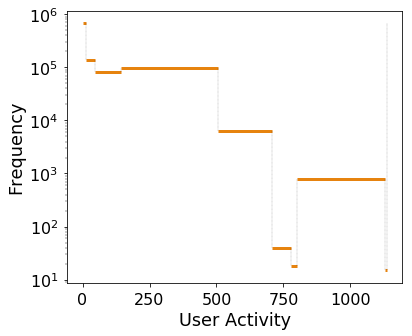

In [29]:
fig, ax = utils.visualize_s3d_model_1d(splits_at_dim, N_dim, 
                                       xlab=feature_list[0], 
                                       ylab='Frequency',
                                       xscale='linear', yscale='log',
                                       #xscale='symlog', yscale='log',
                                       #hlines_kwargs={'color': color_list[0], 'linewidth': 3}
                                       #hlines_kwargs={'color': purple_color, 'linewidth': 3},
                                       hlines_kwargs={'color': orange_color, 'linewidth': 3},
                                       figsize=(6,5),
                                      )
#ax.set_xlabel('Signup Percentile')
#ax.set_yticks([int(i*1e5) for i in range(6)])
#_ = ax.set_yticklabels(pd.np.arange(6))
fig.savefig(fname='figures/freq_{}_{}.pdf'.format(data_name.split('_')[0], dim),
            dpi=1000, format='pdf',
            bbox_inches = 'tight')

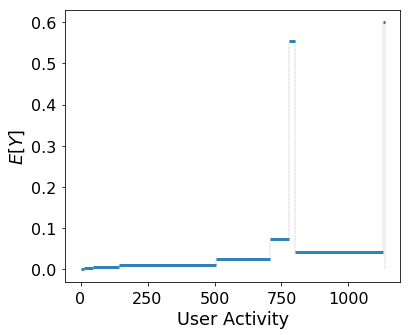

In [30]:
fig, ax = utils.visualize_s3d_model_1d(splits_at_dim, intensity_dim, 
                                       xlab=feature_list[0], ylab=r'$E[Y]$',
                                       xscale='linear', yscale='linear',
                                       #hlines_kwargs={'color': orange_color, 'linewidth': 3}
                                       #hlines_kwargs={'color': '#FDB0B4', 'linewidth': 3},
                                       hlines_kwargs={'color': blue_color, 'linewidth': 3},
                                       figsize=(6,5),
                                      )
fig.savefig(fname='figures/ey_{}_{}.pdf'.format(data_name.split('_')[0], dim),
            dpi=1000, format='pdf',
            bbox_inches = 'tight')

In [31]:
splits_at_dim

[[0.0, 13.0, 47.0, 143.0, 505.0, 707.0, 778.0, 800.0, 1130.0, 1136.0]]

In [32]:
pred_dim

masked_array(data = [False False False False False  True  True False  True],
             mask = False,
       fill_value = True)

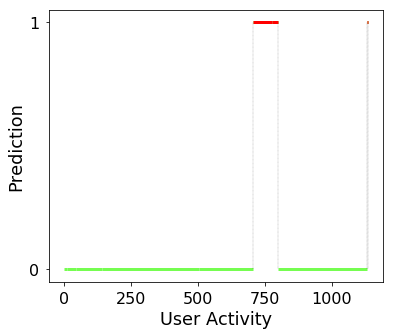

In [33]:
fig, ax = utils.visualize_s3d_model_1d(splits_at_dim, pred_dim, 
                                       xlab=chosen_f_dim[0], ylab=r'Prediction',
                                       #xscale='linear', yscale='linear',
                                       xscale='linear', yscale='linear',
                                       #hlines_kwargs={'color': orange_color, 'linewidth': 3}
                                       figsize=(6,5),
                                       hlines_kwargs={'color': green_color, 'linewidth': 3}
                                      )
for i, pred_i in enumerate(pred_dim.data):
    if not pred_i:
        continue
    xmin = splits_at_dim[0][i]
    xmax = splits_at_dim[0][i+1]
    ax.hlines(y=1, xmax=xmax, xmin=xmin,
              colors='r', lw=3)
 
ax.set_xlabel(feature_list[0])
_ = ax.set_yticks([0, 1])
fig.savefig(fname='figures/pred_{}_{}.pdf'.format(data_name.split('_')[0], dim),
            dpi=1000, format='pdf',
            bbox_inches = 'tight')

###### 2d

In [34]:
dim = 2
splits_at_dim, N_dim, intensity_dim, pred_dim, chosen_f_dim = utils.visualize_s3d_model_reader(model_folder, dim, thres)

In [35]:
splits_at_dim

[[0.0, 13.0, 47.0, 143.0, 505.0, 707.0, 778.0, 800.0, 1130.0, 1136.0],
 [0.0, 101.0, 1371.0, 10093.0, 126022.0]]

In [36]:
splits_at_dim

[[0.0, 13.0, 47.0, 143.0, 505.0, 707.0, 778.0, 800.0, 1130.0, 1136.0],
 [0.0, 101.0, 1371.0, 10093.0, 126022.0]]

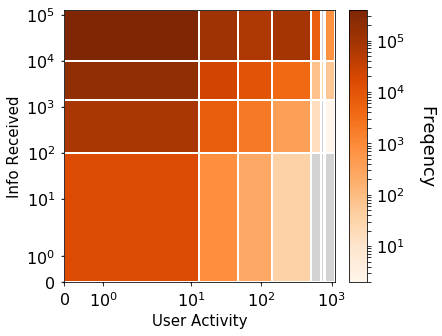

In [37]:
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, freq_cmap, 
                                            N_dim, 'Freqency', feature_list,
                                            unit_w=6, unit_h=5,
                                            #yscale='log', xscale='linear',
                                            yscale='symlog', xscale='symlog',
                                            norm_func=mc.LogNorm,
                                            cb_kwargs ={'aspect': 15},
                                            pcolor_kwargs=pcolor_kwargs,
                                           )
    
ax_arr[0,0].set_facecolor(bgcolor)
#ax_arr[0,0].set_xlim(0.1, 1136)
#ax_arr[0,0].set_ylim(0.1, 126022)
#cb.set_ticklabels(cb_ticks//(10**5))
fig.savefig(fname='figures/freq_{}_{}.pdf'.format(data_name.split('_')[0], dim),
            dpi=1000, format='pdf',
            bbox_inches = 'tight')

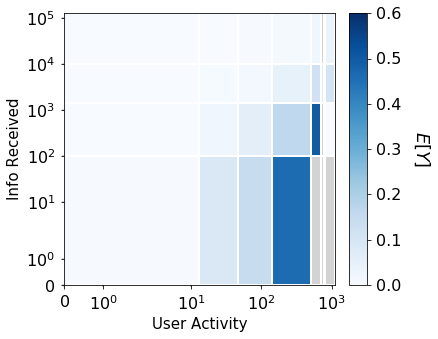

In [38]:
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, my_cmap, 
                                            intensity_dim, '$E[Y]$', feature_list,
                                            unit_w=6, unit_h=5,
                                            xbins_lab_decimal=0,
                                            yscale='symlog', xscale='symlog',
                                            #yscale='log', xscale='linear',
                                            #norm_func=mc.LogNorm,
                                            cb_kwargs ={'aspect': 15},
                                            pcolor_kwargs=pcolor_kwargs,
                                           )
#ax_arr[0,0].set_xlim(0, 1200)
#ax_arr[0,0].set_ylim(1, 10**5)
ax_arr[0,0].set_facecolor(bgcolor)
fig.savefig(fname='figures/ey_{}_{}.pdf'.format(data_name.split('_')[0], dim),
            dpi=1000, format='pdf',
            bbox_inches = 'tight')

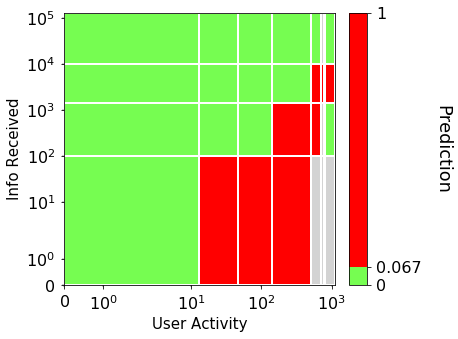

In [39]:
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, pred_cmap, 
                                            pred_dim, 'Prediction', feature_list,
                                            unit_w=6, unit_h=5,
                                            xbins_lab_decimal=0,
                                            yscale='symlog', xscale='symlog',
                                            #yscale='log', xscale='linear',
                                            #norm_func=mc.LogNorm,
                                            cb_kwargs ={'aspect': 15},
                                            pcolor_kwargs=pcolor_kwargs,
                                           )
#ax_arr[0,0].set_xlim(0, 1200)
ax_arr[0,0].set_facecolor(bgcolor)
cb.set_ticks([0, thres, 1])
cb.set_ticklabels(['0', round(thres,3), '1'])
fig.savefig(fname='figures/pred_{}_{}.pdf'.format(data_name.split('_')[0], dim),
            dpi=1000, format='pdf',
            bbox_inches = 'tight')

###### 3d

In [35]:
dim = 3
splits_at_dim, N_dim, intensity_dim, pred_dim, chosen_f_dim = utils.visualize_s3d_model_reader(model_folder, dim, thres)

In [36]:
chosen_f_dim

array(['node_activity', 'node_info_received', 'meme_pop_current'], dtype=object)

In [37]:
splits_at_dim

[[0.0, 13.0, 47.0, 143.0, 505.0, 707.0, 778.0, 800.0, 1130.0, 1136.0],
 [0.0, 101.0, 1371.0, 10093.0, 126022.0],
 [0.0, 1.0, 11.0, 69.0, 102.0, 474.0, 8479.0]]

In [38]:
splits_at_dim

[[0.0, 13.0, 47.0, 143.0, 505.0, 707.0, 778.0, 800.0, 1130.0, 1136.0],
 [0.0, 101.0, 1371.0, 10093.0, 126022.0],
 [0.0, 1.0, 11.0, 69.0, 102.0, 474.0, 8479.0]]

In [39]:
N_dim.data[-1]

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 2, 6, 2, 4, 1],
       [0, 0, 0, 0, 0, 0]])

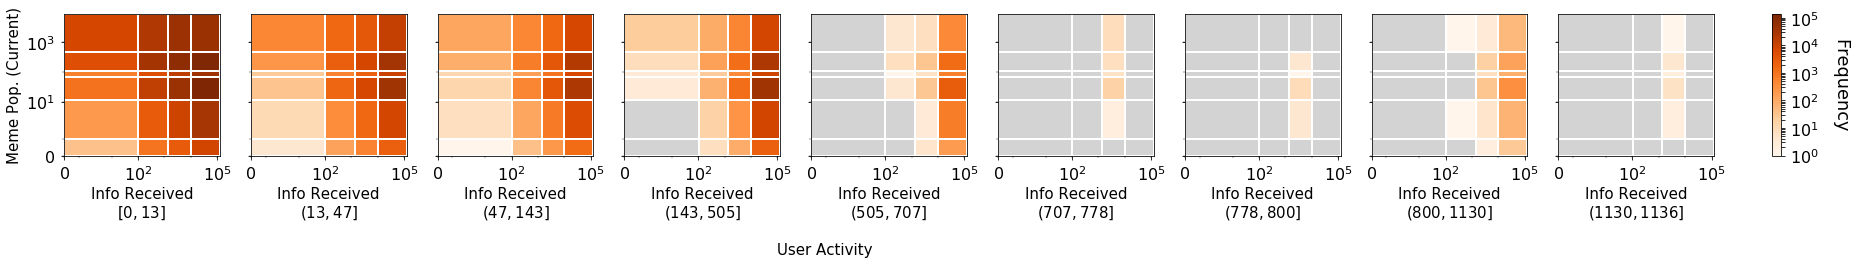

In [40]:
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, freq_cmap, 
                                            N_dim, 'Frequency', feature_list,
                                            xbins_lab_decimal=0,
                                            xlab_x=0.40, #xlab_y=-0.15,
                                            unit_w=4, unit_h=2.6,
                                            yscale='symlog', xscale='symlog',
                                            norm_func=mc.LogNorm,
                                            cb_kwargs ={'aspect': 15},
                                            pcolor_kwargs=pcolor_kwargs,
                                           )
                      
fig.canvas.draw()

for ax in ax_arr.flat:
    ax.set_facecolor(bgcolor)
    ax.set_yticks([0, 10, 10**3])
    ax.set_xticks([0, 10**2, 10**5])
    #ax.set_yticklabels([0, r'$10^2$', r'$10^4$'])
    #ax.set_xticklabels(xlab, fontdict={'size': 10.5})
    #ax.set_xlabel(ax.get_xlabel(), fontdict={'size': 12})
fig.savefig(fname='figures/freq_{}_{}.pdf'.format(data_name.split('_')[0], dim),
            dpi=1000, format='pdf',
            bbox_inches = 'tight')

In [41]:
fig.savefig(fname='figures/freq_{}_{}.png'.format(data_name.split('_')[0], dim),
            dpi=1000, format='png',
            bbox_inches = 'tight')

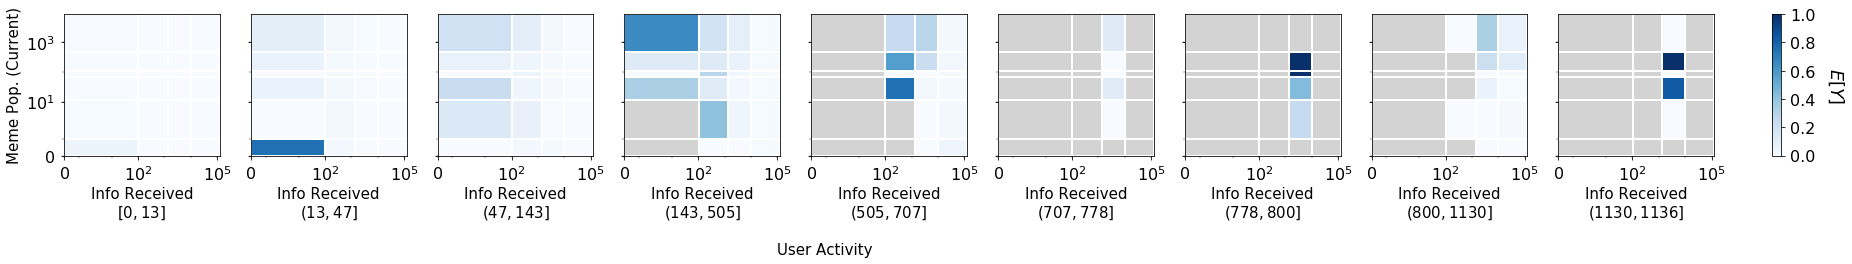

In [42]:
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, my_cmap, 
                                            intensity_dim, '$E[Y]$', feature_list,
                                            xbins_lab_decimal=0,
                                            xlab_x=0.40, #xlab_y=-0.15,
                                            unit_w=4, unit_h=2.6,
                                            yscale='symlog', xscale='symlog',
                                            #norm_func=mc.SymLogNorm,
                                            cb_kwargs ={'aspect': 15},
                                            pcolor_kwargs=pcolor_kwargs,
                                           )
for ax in ax_arr.flat:
    ax.set_facecolor(bgcolor)
    ax.set_yticks([0, 10, 10**3])
    ax.set_xticks([0, 10**2, 10**5])
fig.savefig(fname='figures/ey_{}_{}.pdf'.format(data_name.split('_')[0], dim),
            dpi=1000, format='pdf',
            bbox_inches = 'tight')

In [43]:
fig.savefig(fname='figures/ey_{}_{}.png'.format(data_name.split('_')[0], dim),
            dpi=1000, format='png',
            bbox_inches = 'tight')

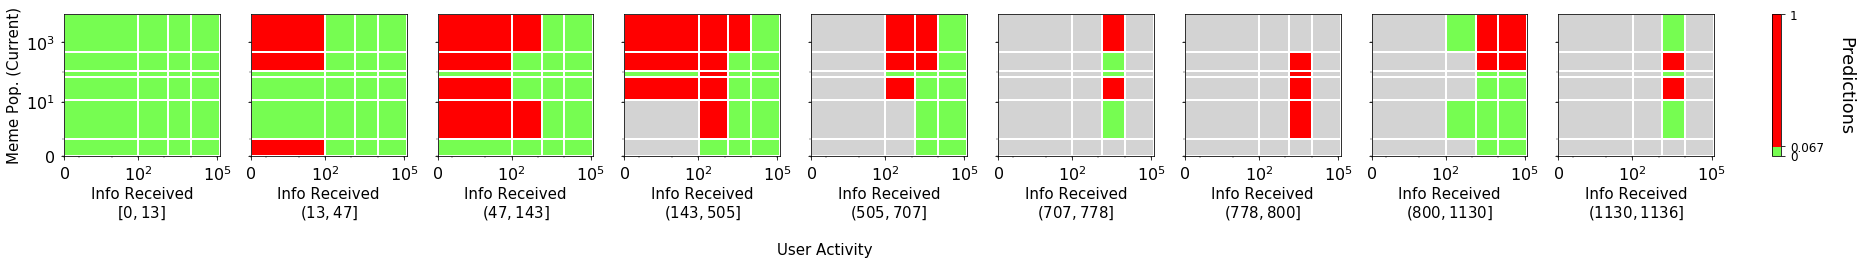

In [44]:
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, pred_cmap, 
                                            pred_dim, 'Predictions', feature_list,
                                            xbins_lab_decimal=0,
                                            xlab_x=0.40, #xlab_y=-0.15,
                                            unit_w=4, unit_h=2.6,
                                            yscale='symlog', xscale='symlog',
                                            cb_kwargs ={'aspect': 15},
                                            pcolor_kwargs=pcolor_kwargs,
                                           )

cb.set_ticks([0, thres, 1])
cb.set_ticklabels(['0', round(thres,3), '1'])
cb.ax.tick_params(labelsize=12) 

for ax in ax_arr.flat:
    ax.set_facecolor(bgcolor)
    ax.set_yticks([0, 10, 10**3])
    ax.set_xticks([0, 10**2, 10**5])
fig.savefig(fname='figures/pred_{}_{}.pdf'.format(data_name.split('_')[0], dim),
            dpi=1000, format='pdf',
            bbox_inches = 'tight')

In [45]:
fig.savefig(fname='figures/pred_{}_{}.png'.format(data_name.split('_')[0], dim),
            dpi=1000, format='png',
            bbox_inches = 'tight')

---

#### khan

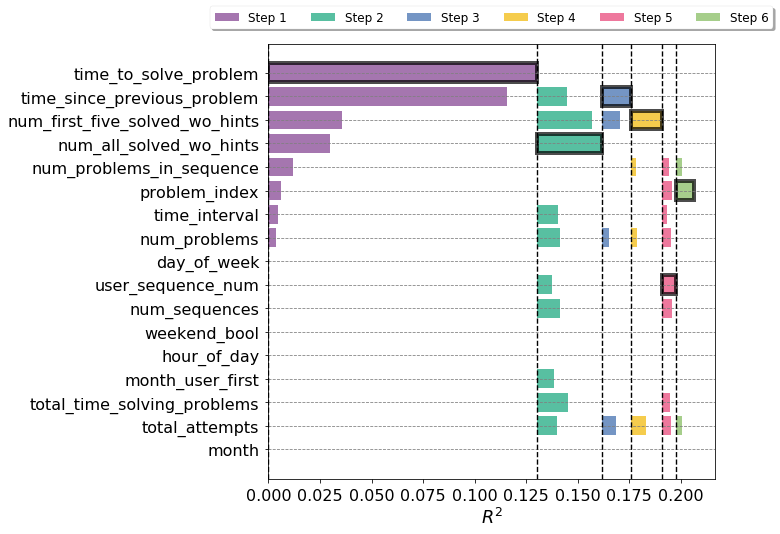

In [71]:
data_name = 'khan_cleaned'
#split_version = 3
#model_folder = 'models/{}/{}/'.format(data_name, split_version)
model_folder = 'full-models/{}/'.format(data_name)
fig, ax = utils.visualize_s3d_steps(model_folder, figsize=(8, 8), 
                                    color_list=color_list, bar_alpha=0.7)

---

#### duolingo

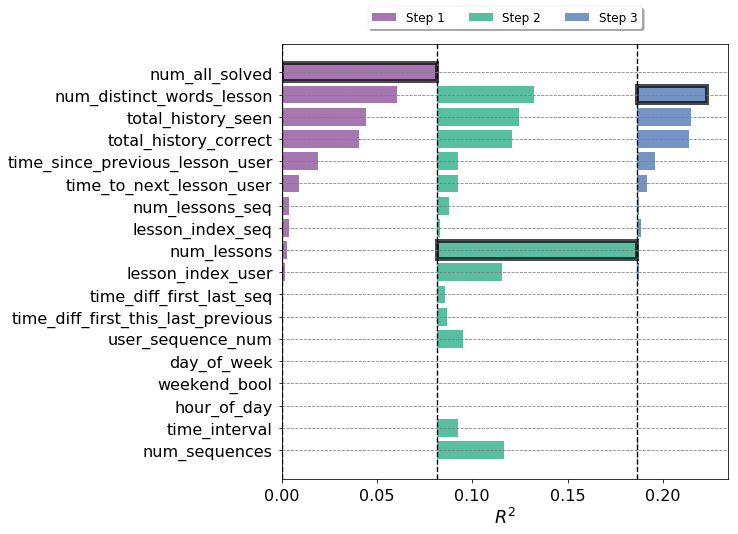

In [72]:
data_name = 'duolingo_cleaned'
#split_version = 4
#model_folder = 'models/{}/{}/'.format(data_name, split_version)
model_folder = 'full-models/{}/'.format(data_name)
fig, ax = utils.visualize_s3d_steps(model_folder, figsize=(8, 8), 
                                    color_list=color_list, bar_alpha=0.7)

---

#### twitter

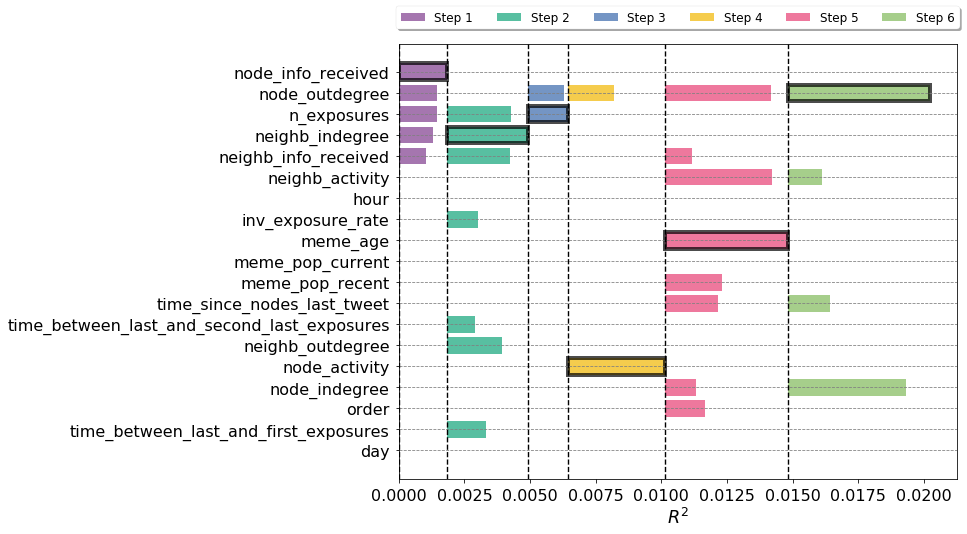

In [73]:
data_name = 'twitter'
#split_version = 4
#model_folder = 'models/{}/{}/'.format(data_name, split_version)
model_folder = 'full-models/{}/'.format(data_name)
fig, ax = utils.visualize_s3d_steps(model_folder, figsize=(10, 8), 
                                    color_list=color_list, bar_alpha=0.7)